# Homework - Data Classification with SVM

### ------Read the Question thoroughly before proceeeding ahead--------

df contains two columns x1 & x2 which is classified into 3 labels 0, 1 and 2. We have to apply SVM on this data to classify this data. Inputs are x1 & x2 and output class labels are in y.

### Perform the following operations:
1. Plot a scatter plot of x1 vs x2. Three colors for 3 different labels with labelling and legends. 
2. Bar Chart of number of rows of each class.
3. Split the dataset using train test split with a 70:30 split. Make the split such that (with trials) there are approximately equal number of rows of each class in the training dataset. 
4. Fit and predict data for the test dataset. 
5. Get the separation of SVM using meshgrid approach.
6. Obtain the confusion matrix for the test dataset. Find out the total number of correct predictions, and incorrect predictions. Which class has the most misclassified data? 

In [1]:
#-------------Do not touch anything here------------------------------------
from sklearn.datasets import make_blobs
import pandas as pd

X, y = make_blobs(n_samples=200, centers=3, random_state=3236, cluster_std=4)
df = pd.DataFrame(data={'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
#-------------Do not touch anything here------------------------------------

In [2]:
df.head()

,x1,x2,y
0,-10.930146,-6.753578,1
1,1.210435,5.300878,2
2,2.665303,2.216286,2
3,7.645781,-2.244924,0
4,1.336352,-1.625267,2


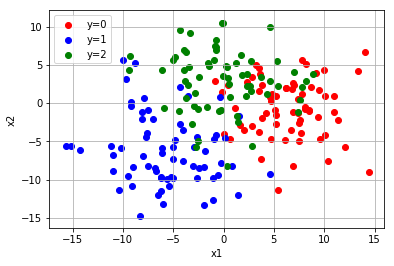

In [12]:
#Plot a scatter plot of x1 vs x2. Three colors for 3 different labels with labelling and legends
import matplotlib.pyplot as plt
y0=df[df['y']==0]
y1=df[df['y']==1]
y2=df[df['y']==2]
plt.scatter(y0['x1'],y0['x2'],color='r',label='y=0')
plt.scatter(y1['x1'],y1['x2'],color='b',label='y=1')
plt.scatter(y2['x1'],y2['x2'],color='g',label='y=2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.axis()
plt.grid()

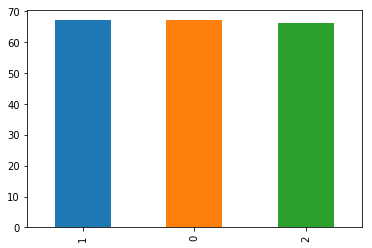

In [4]:
#Bar Chart of number of rows of each class.
df['y'].value_counts().plot(kind='bar')

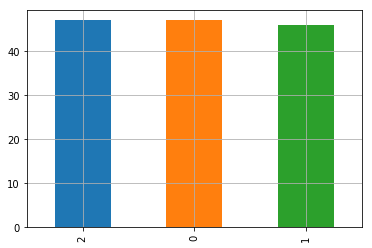

In [5]:
#Split the dataset using train test split with a 70:30 split. Make the split such that (with trials) there are approximately equal number of rows of each class in the training dataset.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df[['x1','x2']],df['y'],test_size=0.3,random_state=3)
plt.figure()
y_train.value_counts().plot(kind='bar')
plt.grid()

In [6]:
#Fit and predict data for the test dataset.
from sklearn.svm import SVC
SVCClassifier=SVC(kernel='linear',C=10)
SVCModel=SVCClassifier.fit(x_train,y_train)
SVCModel.predict(x_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2,
       1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1])

[[-20.   -19.99 -19.98 ...  14.97  14.98  14.99]
 [-20.   -19.99 -19.98 ...  14.97  14.98  14.99]
 [-20.   -19.99 -19.98 ...  14.97  14.98  14.99]
 ...
 [-20.   -19.99 -19.98 ...  14.97  14.98  14.99]
 [-20.   -19.99 -19.98 ...  14.97  14.98  14.99]
 [-20.   -19.99 -19.98 ...  14.97  14.98  14.99]]
[[-16.   -16.   -16.   ... -16.   -16.   -16.  ]
 [-15.99 -15.99 -15.99 ... -15.99 -15.99 -15.99]
 [-15.98 -15.98 -15.98 ... -15.98 -15.98 -15.98]
 ...
 [ 11.97  11.97  11.97 ...  11.97  11.97  11.97]
 [ 11.98  11.98  11.98 ...  11.98  11.98  11.98]
 [ 11.99  11.99  11.99 ...  11.99  11.99  11.99]]
[-20.   -19.99 -19.98 -19.97 -19.96 -19.95 -19.94 -19.93 -19.92 -19.91]
[-16. -16. -16. -16. -16. -16. -16. -16. -16. -16.]
[[-20.   -16.  ]
 [-19.99 -16.  ]
 [-19.98 -16.  ]
 [-19.97 -16.  ]
 [-19.96 -16.  ]
 [-19.95 -16.  ]
 [-19.94 -16.  ]
 [-19.93 -16.  ]
 [-19.92 -16.  ]
 [-19.91 -16.  ]
 [-19.9  -16.  ]
 [-19.89 -16.  ]
 [-19.88 -16.  ]
 [-19.87 -16.  ]
 [-19.86 -16.  ]
 [-19.85 -16.  ]
 [-1

<Figure size 1440x1440 with 0 Axes>

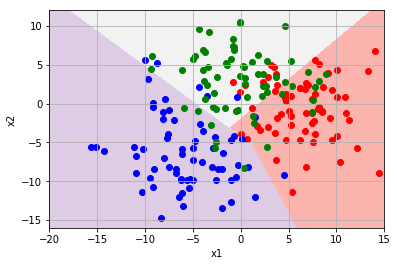

In [7]:
#Get the separation of SVM using meshgrid approach.
import numpy as np

plt.figure(figsize=(20,20)) 

x_min,x_max=-20,15#minimum x/y is 0 and maximum x/y is1
y_min,y_max=-16,12

xx,yy=np.meshgrid(np.arange(x_min,x_max, .01),np.arange(y_min,y_max, .01))

print(xx); print(yy);
xx_lin=xx.ravel(); print(xx_lin[:10]);
yy_lin=yy.ravel(); print(yy_lin[:10]); 
pred_input=np.c_[xx_lin,yy_lin];print(pred_input[:20])

z=SVCModel.predict(pred_input);print(z)
z=z.reshape(xx.shape);print(z)
plt.figure()
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)


plt.scatter(y0['x1'],y0['x2'],color='r',label='y=0')
plt.scatter(y1['x1'],y1['x2'],color='b',label='y=1')
plt.scatter(y2['x1'],y2['x2'],color='g',label='y=2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis()
plt.grid()

In [8]:
from sklearn import metrics
b=metrics.confusion_matrix(y_test,SVCModel.predict(x_test))
print(b)

[[20  0  0]
 [ 1 18  2]
 [ 3  3 13]]


In [9]:
a=np.sum(metrics.confusion_matrix(y_test,SVCModel.predict(x_test)), axis=1)

In [10]:
l=[]
x=[]
for i in range(0,3):
    l.append(a[i]-b[i][i])
    x.append(b[i][i])
print(l) 
print(x)
print('no. of incorrect classification',np.sum(l,axis=0))
print('no. of correct classification',np.sum(x,axis=0))

[0, 3, 6]
[20, 18, 13]
no. of incorrect classification 9
no. of correct classification 51


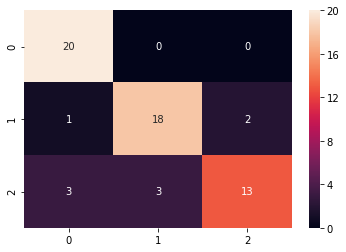

In [11]:
import seaborn as sp
sp.heatmap(metrics.confusion_matrix(y_test,SVCModel.predict(x_test)),annot=True)
new=x_train.join(y_train)